Loading the NBC Data

In [1]:
import pandas as pd
# Specify the path to your Excel file
csv_file_path = "C:\\Users\\Mihir Shah\\Downloads\\NBCData.csv"

# Read the Excel file into a DataFrame
df = pd.read_csv(csv_file_path)

# Now you can work with the DataFrame, for example, printing the first few rows
df

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
...,...,...,...
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1


Importing Necessary Libraries & Packages

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

Defining the Features & Target Variables

In [3]:
# Define features (X) and target variable (y)
X = df[['glucose', 'bloodpressure']]
y = df['diabetes']

Defining the Classifier for Cross Validation

In [4]:
# Define your machine learning model (e.g., Decision Tree Classifier)
model = DecisionTreeClassifier()

Data Has been splitted into 5 Parts

In [5]:
# Create a StratifiedKFold object for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [6]:
# Lists to store metrics for each fold
accuracy_list = []
confusion_matrix_list = []

In [7]:
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

Code for fitting the Model

In [8]:
# Fit the model on the training data
model.fit(X_train, y_train)

DecisionTreeClassifier()

Code for making prediction on test Data

In [9]:
# Make predictions on the test data
y_pred = model.predict(X_test)

Calculating Accuracy and Confusion Matrix

In [10]:
# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

accuracy_list.append(accuracy)
confusion_matrix_list.append(confusion)

In [11]:
# Calculate and print the mean and standard deviation of accuracy
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)

Mean Accuracy: 0.8944723618090452
Standard Deviation of Accuracy: 0.0


In [12]:
# Calculate the mean confusion matrix
mean_confusion_matrix = np.mean(confusion_matrix_list, axis=0)
print("Mean Confusion Matrix:\n", mean_confusion_matrix)

Mean Confusion Matrix:
 [[92.  7.]
 [14. 86.]]


Creating the Heatmap on the bases of Confusion Matrix

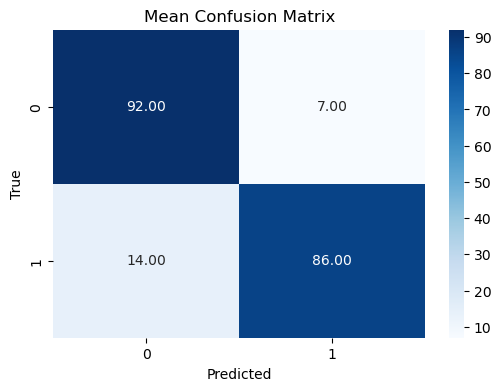

In [14]:
plt.figure(figsize=(6, 4))
sns.heatmap(mean_confusion_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Mean Confusion Matrix')
plt.show()